In [2]:
# -*- coding: utf-8 -*-

# BMI and Diabetes Risk Analysis Project


# Step 1: Install and import required libraries
!pip install scikit-learn seaborn --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('default')
sns.set_style("whitegrid")
sns.set_palette("husl")

print("=" * 70)
print("BMI AND DIABETES RISK ANALYSIS PROJECT")
print("=" * 70)
print("\nThis project analyzes the relationship between BMI and diabetes risk")
print("using synthetic health data with visualizations and predictive modeling.\n")

BMI AND DIABETES RISK ANALYSIS PROJECT

This project analyzes the relationship between BMI and diabetes risk
using synthetic health data with visualizations and predictive modeling.



In [3]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate sample data
n_samples = 1000

print("Generating synthetic health dataset...")
# Create synthetic dataset
data = {
    'Patient_ID': range(1, n_samples + 1),
    'Age': np.random.randint(18, 80, n_samples),
    'Gender': np.random.choice(['Male', 'Female'], n_samples, p=[0.48, 0.52]),
    'BMI': np.random.normal(25, 5, n_samples),
    'Glucose': np.random.normal(100, 20, n_samples),
    'BloodPressure': np.random.normal(80, 12, n_samples),
    'Insulin': np.random.normal(80, 30, n_samples),
    'FamilyHistory': np.random.choice([0, 1], n_samples, p=[0.7, 0.3]),
    'PhysicalActivity': np.random.uniform(0, 10, n_samples),
}

df = pd.DataFrame(data)

# Ensure BMI values are realistic
df['BMI'] = df['BMI'].clip(15, 50)

# Adjust glucose based on BMI (higher BMI tends to have higher glucose)
df['Glucose'] = df['Glucose'] + (df['BMI'] - 25) * 0.5

# Create diabetes risk based on multiple factors
diabetes_risk = (
    0.05 * (df['Age'] - 40) +  # Age effect
    0.08 * (df['BMI'] - 25) +  # BMI effect
    0.12 * (df['Glucose'] - 100) +  # Glucose effect
    0.02 * (df['BloodPressure'] - 80) +  # BP effect
    0.25 * df['FamilyHistory'] * 10 -  # Family history strong effect
    0.05 * df['PhysicalActivity'] +  # Physical activity protective
    np.random.normal(0, 2, n_samples)  # Random noise
)

# Convert to probability and create binary outcome
diabetes_prob = 1 / (1 + np.exp(-diabetes_risk / 8))
df['Diabetes'] = (diabetes_prob > 0.5).astype(int)

# Add some gender effect (slightly different risk profiles)
df.loc[df['Gender'] == 'Female', 'Diabetes'] = (df.loc[df['Gender'] == 'Female', 'Diabetes'] *
                                                np.random.choice([0, 1], sum(df['Gender'] == 'Female'),
                                                                p=[0.3, 0.7]))

print("✓ Dataset created successfully!")
print(f"\nDataset Shape: {df.shape}")
print(f"Number of diabetic patients: {df['Diabetes'].sum()} ({df['Diabetes'].mean():.1%})")

# Display first few rows
print("\nFirst 10 patients in the dataset:")
display(df.head(10))

Generating synthetic health dataset...
✓ Dataset created successfully!

Dataset Shape: (1000, 10)
Number of diabetic patients: 533 (53.3%)

First 10 patients in the dataset:


,Patient_ID,Age,Gender,BMI,Glucose,BloodPressure,Insulin,FamilyHistory,PhysicalActivity,Diabetes
0,1,56,Male,18.913476,107.659567,72.100517,121.764920,0,0.478388,1
1,2,69,Female,22.589766,113.982642,75.290845,89.788093,0,8.501719,0
2,3,46,Male,18.012409,123.730407,82.609560,106.888519,0,9.975826,0
3,4,32,Female,24.523775,79.861889,69.873191,80.635044,0,8.869421,0
4,5,60,Female,26.952012,111.495557,59.968528,78.018350,1,8.104366,1
5,6,25,Male,19.449809,94.790826,81.918520,124.875348,0,3.743060,0
6,7,78,Male,35.245895,103.278263,69.605653,109.183232,1,2.313142,1
7,8,38,Male,26.390530,108.731782,41.126747,83.535760,1,7.348505,1
8,9,56,Male,25.288978,108.297614,86.630809,74.010007,0,3.045754,1
9,10,75,Male,28.848289,112.499506,66.703292,28.784758,0,1.760397,1


In [4]:
# Define BMI categories according to WHO standards
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_Category'] = df['BMI'].apply(bmi_category)

# Create risk level based on multiple factors
def risk_level(row):
    score = 0
    if row['BMI'] >= 30: score += 3
    elif row['BMI'] >= 25: score += 2
    elif row['BMI'] < 18.5: score += 1

    if row['Age'] >= 45: score += 2
    elif row['Age'] >= 35: score += 1

    if row['Glucose'] >= 126: score += 3
    elif row['Glucose'] >= 100: score += 2

    if row['FamilyHistory'] == 1: score += 2
    if row['PhysicalActivity'] < 3: score += 1

    if score <= 3: return 'Low'
    elif score <= 6: return 'Moderate'
    else: return 'High'

df['Risk_Level'] = df.apply(risk_level, axis=1)

print("✓ Data preprocessing completed!")
print("\nBMI Category Distribution:")
bmi_counts = df['BMI_Category'].value_counts()
for category, count in bmi_counts.items():
    print(f"  {category}: {count} patients ({count/len(df):.1%})")

print("\nDiabetes Risk Level Distribution:")
risk_counts = df['Risk_Level'].value_counts()
for level, count in risk_counts.items():
    print(f"  {level}: {count} patients ({count/len(df):.1%})")

✓ Data preprocessing completed!

BMI Category Distribution:
  Normal: 398 patients (39.8%)
  Overweight: 350 patients (35.0%)
  Obese: 157 patients (15.7%)
  Underweight: 95 patients (9.5%)

Diabetes Risk Level Distribution:
  Moderate: 499 patients (49.9%)
  Low: 284 patients (28.4%)
  High: 217 patients (21.7%)


In [5]:
print("\n" + "="*70)
print("EXPLORATORY DATA ANALYSIS")
print("="*70)

# Basic statistics
print("\n📊 BASIC STATISTICS:")
print(df[['Age', 'BMI', 'Glucose', 'BloodPressure', 'PhysicalActivity']].describe().round(2))

# Diabetes statistics by category
print("\n📈 DIABETES PREVALENCE BY CATEGORY:")

# By BMI Category
print("\n1. By BMI Category:")
bmi_diabetes_stats = df.groupby('BMI_Category').agg(
    Total=('Diabetes', 'size'),
    Diabetic=('Diabetes', 'sum'),
    Prevalence=('Diabetes', 'mean')
).round(3)
print(bmi_diabetes_stats)

# By Age Group
print("\n2. By Age Group:")
df['Age_Group'] = pd.cut(df['Age'], bins=[18, 30, 45, 60, 80], labels=['18-30', '31-45', '46-60', '61-80'])
age_diabetes_stats = df.groupby('Age_Group').agg(
    Total=('Diabetes', 'size'),
    Diabetic=('Diabetes', 'sum'),
    Prevalence=('Diabetes', 'mean')
).round(3)
print(age_diabetes_stats)

# By Gender
print("\n3. By Gender:")
gender_diabetes_stats = df.groupby('Gender').agg(
    Total=('Diabetes', 'size'),
    Diabetic=('Diabetes', 'sum'),
    Prevalence=('Diabetes', 'mean')
).round(3)
print(gender_diabetes_stats)


EXPLORATORY DATA ANALYSIS

📊 BASIC STATISTICS:
           Age      BMI  Glucose  BloodPressure  PhysicalActivity
count  1000.00  1000.00  1000.00        1000.00           1000.00
mean     49.86    25.14   100.66          79.97              5.06
std      18.11     4.97    20.59          11.89              2.95
min      18.00    15.00    39.32          41.13              0.02
25%      35.00    21.56    86.56          72.22              2.56
50%      50.00    25.14   101.40          79.80              5.03
75%      66.00    28.60   114.15          88.24              7.67
max      79.00    41.27   165.74         123.89             10.00

📈 DIABETES PREVALENCE BY CATEGORY:

1. By BMI Category:
              Total  Diabetic  Prevalence
BMI_Category                             
Normal          398       198       0.497
Obese           157        97       0.618
Overweight      350       200       0.571
Underweight      95        38       0.400

2. By Age Group:
           Total  Diabetic  Pre


DATA VISUALIZATIONS


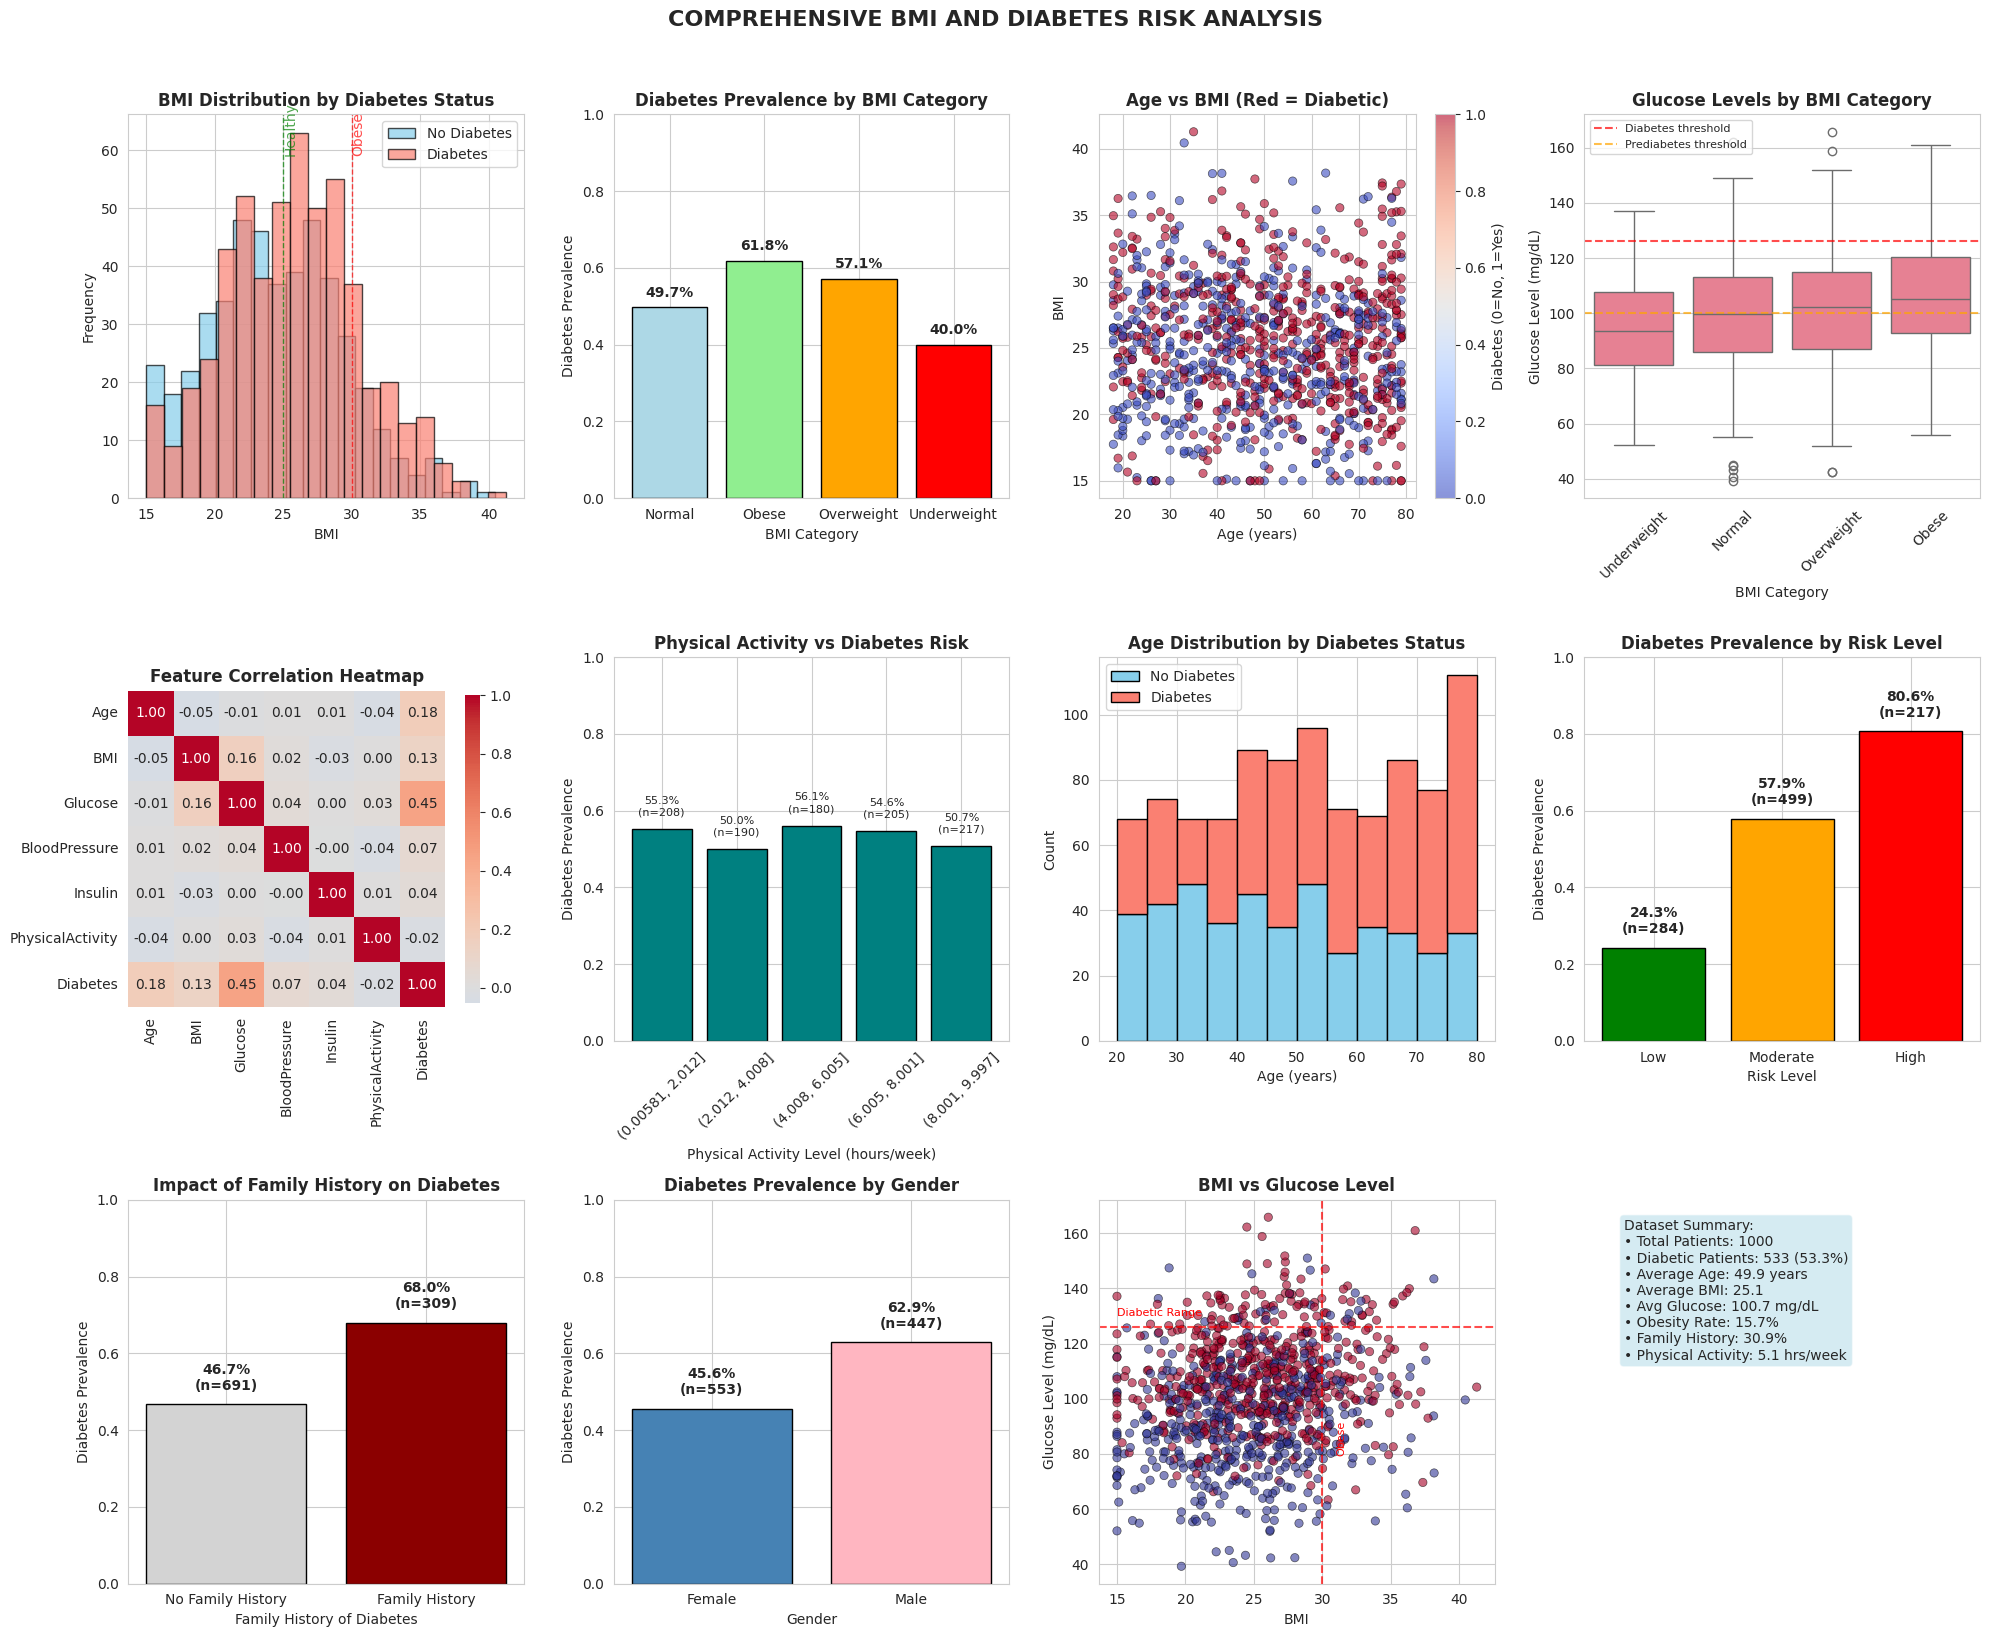

✓ All visualizations generated successfully!


In [6]:
print("\n" + "="*70)
print("DATA VISUALIZATIONS")
print("="*70)

# Set up the figure with multiple subplots
fig = plt.figure(figsize=(20, 16))

# 1. BMI Distribution by Diabetes Status
ax1 = plt.subplot(3, 4, 1)
no_diabetes_bmi = df[df['Diabetes'] == 0]['BMI']
diabetes_bmi = df[df['Diabetes'] == 1]['BMI']

ax1.hist(no_diabetes_bmi, bins=20, alpha=0.7, label='No Diabetes', color='skyblue', edgecolor='black')
ax1.hist(diabetes_bmi, bins=20, alpha=0.7, label='Diabetes', color='salmon', edgecolor='black')
ax1.set_xlabel('BMI')
ax1.set_ylabel('Frequency')
ax1.set_title('BMI Distribution by Diabetes Status', fontsize=12, fontweight='bold')
ax1.legend()
ax1.axvline(x=25, color='green', linestyle='--', alpha=0.7, linewidth=1)
ax1.axvline(x=30, color='red', linestyle='--', alpha=0.7, linewidth=1)
ax1.text(25, ax1.get_ylim()[1]*0.9, 'Healthy', rotation=90, color='green', alpha=0.7)
ax1.text(30, ax1.get_ylim()[1]*0.9, 'Obese', rotation=90, color='red', alpha=0.7)

# 2. Diabetes Prevalence by BMI Category
ax2 = plt.subplot(3, 4, 2)
bmi_prevalence = df.groupby('BMI_Category')['Diabetes'].mean().sort_index()
colors = ['lightblue', 'lightgreen', 'orange', 'red']
bars = ax2.bar(bmi_prevalence.index, bmi_prevalence.values, color=colors, edgecolor='black')
ax2.set_xlabel('BMI Category')
ax2.set_ylabel('Diabetes Prevalence')
ax2.set_title('Diabetes Prevalence by BMI Category', fontsize=12, fontweight='bold')
ax2.set_ylim(0, 1)
for bar, value in zip(bars, bmi_prevalence.values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{value:.1%}', ha='center', va='bottom', fontweight='bold')

# 3. Age vs BMI Scatter Plot
ax3 = plt.subplot(3, 4, 3)
scatter = ax3.scatter(df['Age'], df['BMI'], c=df['Diabetes'],
                      cmap='coolwarm', alpha=0.6, edgecolors='black', linewidth=0.5)
ax3.set_xlabel('Age (years)')
ax3.set_ylabel('BMI')
ax3.set_title('Age vs BMI (Red = Diabetic)', fontsize=12, fontweight='bold')
cbar = plt.colorbar(scatter, ax=ax3)
cbar.set_label('Diabetes (0=No, 1=Yes)')

# 4. Glucose Levels by BMI Category
ax4 = plt.subplot(3, 4, 4)
sns.boxplot(data=df, x='BMI_Category', y='Glucose', ax=ax4,
            order=['Underweight', 'Normal', 'Overweight', 'Obese'])
ax4.set_xlabel('BMI Category')
ax4.set_ylabel('Glucose Level (mg/dL)')
ax4.set_title('Glucose Levels by BMI Category', fontsize=12, fontweight='bold')
ax4.tick_params(axis='x', rotation=45)
ax4.axhline(y=126, color='red', linestyle='--', alpha=0.7, label='Diabetes threshold')
ax4.axhline(y=100, color='orange', linestyle='--', alpha=0.7, label='Prediabetes threshold')
ax4.legend(fontsize=8)

# 5. Correlation Heatmap
ax5 = plt.subplot(3, 4, 5)
correlation_matrix = df[['Age', 'BMI', 'Glucose', 'BloodPressure',
                         'Insulin', 'PhysicalActivity', 'Diabetes']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, ax=ax5, fmt='.2f', cbar_kws={"shrink": 0.8})
ax5.set_title('Feature Correlation Heatmap', fontsize=12, fontweight='bold')

# 6. Physical Activity vs Diabetes Risk
ax6 = plt.subplot(3, 4, 6)
activity_bins = pd.cut(df['PhysicalActivity'], bins=5)
activity_diabetes = df.groupby(activity_bins)['Diabetes'].mean()
activity_counts = df.groupby(activity_bins).size()
ax6.bar(range(len(activity_diabetes)), activity_diabetes.values,
        color='teal', edgecolor='black')
ax6.set_xlabel('Physical Activity Level (hours/week)')
ax6.set_ylabel('Diabetes Prevalence')
ax6.set_title('Physical Activity vs Diabetes Risk', fontsize=12, fontweight='bold')
ax6.set_xticks(range(len(activity_diabetes)))
ax6.set_xticklabels([str(i) for i in activity_diabetes.index], rotation=45)
ax6.set_ylim(0, 1)
for i, (prev, count) in enumerate(zip(activity_diabetes.values, activity_counts.values)):
    ax6.text(i, prev + 0.03, f'{prev:.1%}\n(n={count})',
             ha='center', va='bottom', fontsize=8)

# 7. Age Distribution by Diabetes Status
ax7 = plt.subplot(3, 4, 7)
age_bins = np.arange(20, 85, 5)
ax7.hist([df[df['Diabetes']==0]['Age'], df[df['Diabetes']==1]['Age']],
         bins=age_bins, label=['No Diabetes', 'Diabetes'],
         color=['skyblue', 'salmon'], edgecolor='black', stacked=True)
ax7.set_xlabel('Age (years)')
ax7.set_ylabel('Count')
ax7.set_title('Age Distribution by Diabetes Status', fontsize=12, fontweight='bold')
ax7.legend()

# 8. Risk Level Analysis
ax8 = plt.subplot(3, 4, 8)
risk_diabetes = df.groupby('Risk_Level')['Diabetes'].mean().reindex(['Low', 'Moderate', 'High'])
risk_counts = df['Risk_Level'].value_counts().reindex(['Low', 'Moderate', 'High'])
x_pos = np.arange(len(risk_diabetes))
bars = ax8.bar(x_pos, risk_diabetes.values, color=['green', 'orange', 'red'], edgecolor='black')
ax8.set_xlabel('Risk Level')
ax8.set_ylabel('Diabetes Prevalence')
ax8.set_title('Diabetes Prevalence by Risk Level', fontsize=12, fontweight='bold')
ax8.set_xticks(x_pos)
ax8.set_xticklabels(risk_diabetes.index)
ax8.set_ylim(0, 1)
for i, (prev, count) in enumerate(zip(risk_diabetes.values, risk_counts.values)):
    ax8.text(i, prev + 0.03, f'{prev:.1%}\n(n={count})',
             ha='center', va='bottom', fontweight='bold')

# 9. Family History Impact
ax9 = plt.subplot(3, 4, 9)
family_diabetes = df.groupby('FamilyHistory')['Diabetes'].mean()
family_counts = df['FamilyHistory'].value_counts()
bars = ax9.bar(['No Family History', 'Family History'], family_diabetes.values,
               color=['lightgray', 'darkred'], edgecolor='black')
ax9.set_xlabel('Family History of Diabetes')
ax9.set_ylabel('Diabetes Prevalence')
ax9.set_title('Impact of Family History on Diabetes', fontsize=12, fontweight='bold')
ax9.set_ylim(0, 1)
for i, (prev, count) in enumerate(zip(family_diabetes.values, family_counts.values)):
    ax9.text(i, prev + 0.03, f'{prev:.1%}\n(n={count})',
             ha='center', va='bottom', fontweight='bold')

# 10. Gender Comparison
ax10 = plt.subplot(3, 4, 10)
gender_diabetes = df.groupby('Gender')['Diabetes'].mean()
gender_counts = df['Gender'].value_counts()
bars = ax10.bar(gender_diabetes.index, gender_diabetes.values,
                color=['steelblue', 'lightpink'], edgecolor='black')
ax10.set_xlabel('Gender')
ax10.set_ylabel('Diabetes Prevalence')
ax10.set_title('Diabetes Prevalence by Gender', fontsize=12, fontweight='bold')
ax10.set_ylim(0, 1)
for i, (prev, count) in enumerate(zip(gender_diabetes.values, gender_counts.values)):
    ax10.text(i, prev + 0.03, f'{prev:.1%}\n(n={count})',
              ha='center', va='bottom', fontweight='bold')

# 11. BMI vs Glucose Scatter
ax11 = plt.subplot(3, 4, 11)
scatter2 = ax11.scatter(df['BMI'], df['Glucose'], c=df['Diabetes'],
                        cmap='RdYlBu_r', alpha=0.6, edgecolors='black', linewidth=0.5)
ax11.set_xlabel('BMI')
ax11.set_ylabel('Glucose Level (mg/dL)')
ax11.set_title('BMI vs Glucose Level', fontsize=12, fontweight='bold')
ax11.axhline(y=126, color='red', linestyle='--', alpha=0.7)
ax11.axvline(x=30, color='red', linestyle='--', alpha=0.7)
ax11.text(15, 130, 'Diabetic Range', color='red', fontsize=8)
ax11.text(31, 80, 'Obese', color='red', fontsize=8, rotation=90)

# 12. Summary Statistics
ax12 = plt.subplot(3, 4, 12)
ax12.axis('off')
summary_text = (
    f"Dataset Summary:\n"
    f"• Total Patients: {len(df)}\n"
    f"• Diabetic Patients: {df['Diabetes'].sum()} ({df['Diabetes'].mean():.1%})\n"
    f"• Average Age: {df['Age'].mean():.1f} years\n"
    f"• Average BMI: {df['BMI'].mean():.1f}\n"
    f"• Avg Glucose: {df['Glucose'].mean():.1f} mg/dL\n"
    f"• Obesity Rate: {(df['BMI'] >= 30).mean():.1%}\n"
    f"• Family History: {df['FamilyHistory'].mean():.1%}\n"
    f"• Physical Activity: {df['PhysicalActivity'].mean():.1f} hrs/week"
)
ax12.text(0.1, 0.95, summary_text, transform=ax12.transAxes,
          fontsize=10, verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.suptitle('COMPREHENSIVE BMI AND DIABETES RISK ANALYSIS',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("✓ All visualizations generated successfully!")

In [7]:
print("\n" + "="*70)
print("STATISTICAL ANALYSIS")
print("="*70)

from scipy import stats

print("\n📊 HYPOTHESIS TESTING RESULTS:")

# T-test for BMI between diabetic and non-diabetic groups
diabetic_bmi = df[df['Diabetes'] == 1]['BMI']
non_diabetic_bmi = df[df['Diabetes'] == 0]['BMI']

t_stat, p_value = stats.ttest_ind(diabetic_bmi, non_diabetic_bmi)
print("\n1. T-test for BMI difference:")
print(f"   Diabetic patients mean BMI: {diabetic_bmi.mean():.2f}")
print(f"   Non-diabetic patients mean BMI: {non_diabetic_bmi.mean():.2f}")
print(f"   Difference: {diabetic_bmi.mean() - non_diabetic_bmi.mean():.2f}")
print(f"   T-statistic: {t_stat:.4f}")
print(f"   P-value: {p_value:.4f}")
if p_value < 0.05:
    print("   → SIGNIFICANT: There is a statistically significant difference in BMI between groups (p < 0.05)")
else:
    print("   → NOT SIGNIFICANT: No significant difference in BMI between groups")

# T-test for Age
diabetic_age = df[df['Diabetes'] == 1]['Age']
non_diabetic_age = df[df['Diabetes'] == 0]['Age']
t_stat_age, p_value_age = stats.ttest_ind(diabetic_age, non_diabetic_age)
print(f"\n2. T-test for Age difference:")
print(f"   Diabetic patients mean age: {diabetic_age.mean():.2f}")
print(f"   Non-diabetic patients mean age: {non_diabetic_age.mean():.2f}")
print(f"   T-statistic: {t_stat_age:.4f}")
print(f"   P-value: {p_value_age:.4f}")

# Chi-square test for BMI categories
contingency_table = pd.crosstab(df['BMI_Category'], df['Diabetes'])
chi2, p_value_chi, dof, expected = stats.chi2_contingency(contingency_table)
print(f"\n3. Chi-square test for BMI categories:")
print(f"   Chi-square statistic: {chi2:.4f}")
print(f"   P-value: {p_value_chi:.6f}")
print(f"   Degrees of freedom: {dof}")
if p_value_chi < 0.05:
    print("   → SIGNIFICANT: Strong association between BMI category and diabetes")
else:
    print("   → NOT SIGNIFICANT: No significant association")

# Odds ratio calculation for obesity
print(f"\n4. ODDS RATIO CALCULATION:")
obese_diabetic = len(df[(df['BMI_Category'] == 'Obese') & (df['Diabetes'] == 1)])
obese_non_diabetic = len(df[(df['BMI_Category'] == 'Obese') & (df['Diabetes'] == 0)])
normal_diabetic = len(df[(df['BMI_Category'] == 'Normal') & (df['Diabetes'] == 1)])
normal_non_diabetic = len(df[(df['BMI_Category'] == 'Normal') & (df['Diabetes'] == 0)])

odds_ratio = (obese_diabetic / obese_non_diabetic) / (normal_diabetic / normal_non_diabetic)
print(f"   Obese diabetic: {obese_diabetic}")
print(f"   Obese non-diabetic: {obese_non_diabetic}")
print(f"   Normal diabetic: {normal_diabetic}")
print(f"   Normal non-diabetic: {normal_non_diabetic}")
print(f"   Odds Ratio (Obese vs Normal): {odds_ratio:.2f}")
print(f"   Interpretation: Obese individuals have {odds_ratio:.1f} times higher odds of diabetes")

# Correlation analysis
print(f"\n5. CORRELATION ANALYSIS:")
correlations = df[['BMI', 'Age', 'Glucose', 'BloodPressure', 'PhysicalActivity', 'Diabetes']].corr()['Diabetes']
print("   Correlation with Diabetes:")
for feature, corr in correlations.items():
    if feature != 'Diabetes':
        strength = "Strong" if abs(corr) > 0.5 else "Moderate" if abs(corr) > 0.3 else "Weak"
        direction = "positive" if corr > 0 else "negative"
        print(f"   • {feature}: {corr:.3f} ({strength} {direction} correlation)")


STATISTICAL ANALYSIS

📊 HYPOTHESIS TESTING RESULTS:

1. T-test for BMI difference:
   Diabetic patients mean BMI: 25.74
   Non-diabetic patients mean BMI: 24.45
   Difference: 1.29
   T-statistic: 4.1357
   P-value: 0.0000
   → SIGNIFICANT: There is a statistically significant difference in BMI between groups (p < 0.05)

2. T-test for Age difference:
   Diabetic patients mean age: 52.99
   Non-diabetic patients mean age: 46.28
   T-statistic: 5.9402
   P-value: 0.0000

3. Chi-square test for BMI categories:
   Chi-square statistic: 15.3837
   P-value: 0.001516
   Degrees of freedom: 3
   → SIGNIFICANT: Strong association between BMI category and diabetes

4. ODDS RATIO CALCULATION:
   Obese diabetic: 97
   Obese non-diabetic: 60
   Normal diabetic: 198
   Normal non-diabetic: 200
   Odds Ratio (Obese vs Normal): 1.63
   Interpretation: Obese individuals have 1.6 times higher odds of diabetes

5. CORRELATION ANALYSIS:
   Correlation with Diabetes:
   • BMI: 0.130 (Weak positive correla


PREDICTIVE MODELING

📈 Features used for prediction: Age, Gender, BMI, Glucose, BloodPressure, FamilyHistory, PhysicalActivity, BMI_Category
   Target variable: Diabetes (0 = No, 1 = Yes)
   Dataset shape: (1000, 8)

📊 Data Split:
   Training set: 700 samples (70.0%)
   Test set: 300 samples (30.0%)
   Diabetes prevalence in train set: 53.3%
   Diabetes prevalence in test set: 53.3%

🚀 Training Logistic Regression Model...

✅ Model Evaluation Results:
   Accuracy: 0.7700 (77.0%)
   Precision: 0.7935
   Recall: 0.7688
   F1-Score: 0.7810

📋 Confusion Matrix:
                    Predicted No Diabetes  Predicted Diabetes
Actual No Diabetes                    108                  32
Actual Diabetes                        37                 123

📊 Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.74      0.77      0.76       140
    Diabetes       0.79      0.77      0.78       160

    accuracy                           0.77       300
   ma

,Feature,Coefficient,Absolute_Importance
3,Glucose,1.342518,1.342518
0,Age,0.545759,0.545759
5,FamilyHistory,0.472150,0.472150
1,Gender,-0.445093,0.445093
2,BMI,0.262976,0.262976
7,BMI_Category,-0.156978,0.156978
6,PhysicalActivity,-0.112755,0.112755
4,BloodPressure,0.112317,0.112317


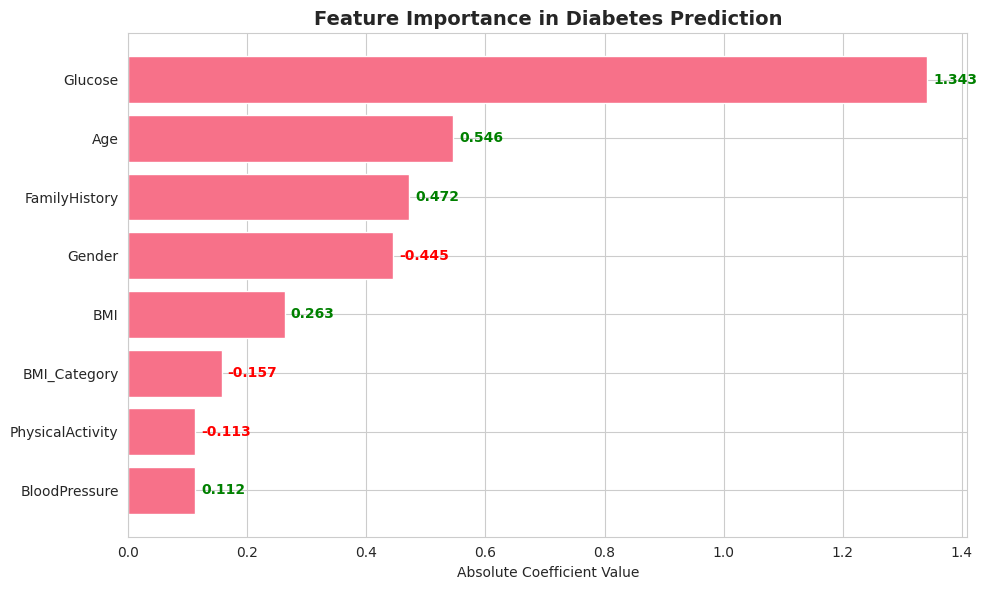


📈 MODEL PERFORMANCE METRICS:
1. Accuracy: Proportion of correct predictions
2. Precision: Proportion of true diabetics among predicted diabetics
3. Recall: Proportion of diabetics correctly identified
4. F1-Score: Harmonic mean of precision and recall

Model correctly predicts 77.0% of cases
Of those predicted as diabetic, 79.4% actually have diabetes
The model identifies 76.9% of all actual diabetic cases


In [8]:
print("\n" + "="*70)
print("PREDICTIVE MODELING")
print("="*70)

# Encode categorical variables
df_encoded = df.copy()
df_encoded['Gender'] = df_encoded['Gender'].map({'Male': 0, 'Female': 1})
df_encoded['BMI_Category'] = df_encoded['BMI_Category'].map({
    'Underweight': 0, 'Normal': 1, 'Overweight': 2, 'Obese': 3
})

# Prepare features and target
features = ['Age', 'Gender', 'BMI', 'Glucose', 'BloodPressure',
            'FamilyHistory', 'PhysicalActivity', 'BMI_Category']
X = df_encoded[features]
y = df_encoded['Diabetes']

print(f"\n📈 Features used for prediction: {', '.join(features)}")
print(f"   Target variable: Diabetes (0 = No, 1 = Yes)")
print(f"   Dataset shape: {X.shape}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\n📊 Data Split:")
print(f"   Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(df):.1%})")
print(f"   Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(df):.1%})")
print(f"   Diabetes prevalence in train set: {y_train.mean():.1%}")
print(f"   Diabetes prevalence in test set: {y_test.mean():.1%}")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n🚀 Training Logistic Regression Model...")

# Train logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = classification_report(y_test, y_pred, output_dict=True)['1']['precision']
recall = classification_report(y_test, y_pred, output_dict=True)['1']['recall']
f1 = classification_report(y_test, y_pred, output_dict=True)['1']['f1-score']

print("\n✅ Model Evaluation Results:")
print(f"   Accuracy: {accuracy:.4f} ({accuracy*100:.1f}%)")
print(f"   Precision: {precision:.4f}")
print(f"   Recall: {recall:.4f}")
print(f"   F1-Score: {f1:.4f}")

print("\n📋 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index=['Actual No Diabetes', 'Actual Diabetes'],
                     columns=['Predicted No Diabetes', 'Predicted Diabetes'])
print(cm_df)

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']))

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0],
    'Absolute_Importance': abs(model.coef_[0])
}).sort_values('Absolute_Importance', ascending=False)

print("\n🔍 Feature Importance (Logistic Regression Coefficients):")
display(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance['Feature'], feature_importance['Absolute_Importance'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance in Diabetes Prediction', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# Add coefficient values on bars
for bar, coeff in zip(bars, feature_importance['Coefficient']):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f'{coeff:.3f}', va='center', fontweight='bold',
             color='green' if coeff > 0 else 'red')

plt.tight_layout()
plt.show()

# Model performance metrics
print("\n📈 MODEL PERFORMANCE METRICS:")
print("1. Accuracy: Proportion of correct predictions")
print("2. Precision: Proportion of true diabetics among predicted diabetics")
print("3. Recall: Proportion of diabetics correctly identified")
print("4. F1-Score: Harmonic mean of precision and recall")
print(f"\nModel correctly predicts {accuracy*100:.1f}% of cases")
print(f"Of those predicted as diabetic, {precision*100:.1f}% actually have diabetes")
print(f"The model identifies {recall*100:.1f}% of all actual diabetic cases")

In [9]:
print("\n" + "="*70)
print("INTERACTIVE DIABETES RISK CALCULATOR")
print("="*70)

def calculate_diabetes_risk(age, gender, bmi, glucose, bp, family_history, physical_activity):
    """Calculate diabetes risk based on input parameters"""

    # Convert gender to numeric
    gender_numeric = 0 if gender.lower() == 'male' else 1

    # Calculate BMI category
    if bmi < 18.5:
        bmi_category_num = 0  # Underweight
    elif 18.5 <= bmi < 25:
        bmi_category_num = 1  # Normal
    elif 25 <= bmi < 30:
        bmi_category_num = 2  # Overweight
    else:
        bmi_category_num = 3  # Obese

    # Prepare input for model
    input_data = np.array([[age, gender_numeric, bmi, glucose, bp,
                           family_history, physical_activity, bmi_category_num]])
    input_scaled = scaler.transform(input_data)

    # Get model prediction
    risk_probability = model.predict_proba(input_scaled)[0, 1]

    # Manual risk calculation (for comparison)
    manual_score = 0

    # BMI contribution
    if bmi >= 30:
        manual_score += 3
    elif bmi >= 25:
        manual_score += 2
    elif bmi < 18.5:
        manual_score += 1

    # Age contribution
    if age >= 45:
        manual_score += 2
    elif age >= 35:
        manual_score += 1

    # Glucose contribution
    if glucose >= 126:
        manual_score += 3
    elif glucose >= 100:
        manual_score += 2

    # Family history
    if family_history == 1:
        manual_score += 2

    # Physical activity
    if physical_activity < 3:
        manual_score += 1

    # Convert score to risk level
    if manual_score <= 3:
        risk_level = "Low"
        risk_desc = "Your risk of developing diabetes is relatively low."
        recommendations = [
            "Maintain healthy lifestyle",
            "Continue regular check-ups",
            "Keep BMI in normal range"
        ]
    elif manual_score <= 6:
        risk_level = "Moderate"
        risk_desc = "You have moderate risk factors for diabetes."
        recommendations = [
            "Consider weight management",
            "Increase physical activity",
            "Monitor blood glucose",
            "Improve diet quality"
        ]
    else:
        risk_level = "High"
        risk_desc = "You have several risk factors for diabetes."
        recommendations = [
            "Consult healthcare provider",
            "Lose weight if overweight",
            "Regular glucose monitoring",
            "Adopt diabetes-prevention diet",
            "Aim for 150+ mins exercise/week"
        ]

    # Calculate risk percentage from manual score
    manual_risk_percent = min(95, max(5, (manual_score / 12) * 100))

    return {
        'model_risk': risk_probability * 100,
        'manual_risk': manual_risk_percent,
        'risk_level': risk_level,
        'risk_description': risk_desc,
        'recommendations': recommendations,
        'risk_score': manual_score
    }

print("\n🎯 EXAMPLE CALCULATIONS:")
print("-" * 80)

# Example cases
cases = [
    {
        'name': 'Low Risk Case',
        'age': 28,
        'gender': 'Male',
        'bmi': 22.5,
        'glucose': 92,
        'bp': 118,
        'family_history': 0,
        'physical_activity': 7
    },
    {
        'name': 'Moderate Risk Case',
        'age': 42,
        'gender': 'Female',
        'bmi': 27.8,
        'glucose': 115,
        'bp': 128,
        'family_history': 1,
        'physical_activity': 3
    },
    {
        'name': 'High Risk Case',
        'age': 58,
        'gender': 'Male',
        'bmi': 34.2,
        'glucose': 142,
        'bp': 145,
        'family_history': 1,
        'physical_activity': 1
    }
]

for i, case in enumerate(cases, 1):
    result = calculate_diabetes_risk(
        case['age'], case['gender'], case['bmi'],
        case['glucose'], case['bp'], case['family_history'],
        case['physical_activity']
    )

    print(f"\n{i}. {case['name']}:")
    print(f"   Age: {case['age']}, Gender: {case['gender']}, BMI: {case['bmi']:.1f}")
    print(f"   Glucose: {case['glucose']} mg/dL, BP: {case['bp']} mmHg")
    print(f"   Family History: {'Yes' if case['family_history'] else 'No'}")
    print(f"   Physical Activity: {case['physical_activity']} hrs/week")
    print(f"\n   📊 RISK ASSESSMENT:")
    print(f"   • Machine Learning Model Risk: {result['model_risk']:.1f}%")
    print(f"   • Clinical Risk Score: {result['risk_score']}/12")
    print(f"   • Risk Level: {result['risk_level']}")
    print(f"   • {result['risk_description']}")
    print(f"   💡 RECOMMENDATIONS:")
    for j, rec in enumerate(result['recommendations'], 1):
        print(f"     {j}. {rec}")

print("\n" + "-" * 80)
print("💡 HOW TO USE THIS CALCULATOR:")
print("1. Enter your health metrics in the function parameters")
print("2. Get your personalized diabetes risk assessment")
print("3. Follow recommendations to reduce your risk")
print("4. Always consult healthcare provider for medical advice")


INTERACTIVE DIABETES RISK CALCULATOR

🎯 EXAMPLE CALCULATIONS:
--------------------------------------------------------------------------------

1. Low Risk Case:
   Age: 28, Gender: Male, BMI: 22.5
   Glucose: 92 mg/dL, BP: 118 mmHg
   Family History: No
   Physical Activity: 7 hrs/week

   📊 RISK ASSESSMENT:
   • Machine Learning Model Risk: 34.9%
   • Clinical Risk Score: 0/12
   • Risk Level: Low
   • Your risk of developing diabetes is relatively low.
   💡 RECOMMENDATIONS:
     1. Maintain healthy lifestyle
     2. Continue regular check-ups
     3. Keep BMI in normal range

2. Moderate Risk Case:
   Age: 42, Gender: Female, BMI: 27.8
   Glucose: 115 mg/dL, BP: 128 mmHg
   Family History: Yes
   Physical Activity: 3 hrs/week

   📊 RISK ASSESSMENT:
   • Machine Learning Model Risk: 85.2%
   • Clinical Risk Score: 7/12
   • Risk Level: High
   • You have several risk factors for diabetes.
   💡 RECOMMENDATIONS:
     1. Consult healthcare provider
     2. Lose weight if overweight
   

In [10]:
print("\n" + "="*70)
print("RISK FACTOR ANALYSIS AND PREVENTION STRATEGIES")
print("="*70)

# Calculate population attributable risk for each factor
print("\n🔍 POPULATION ATTRIBUTABLE RISK ANALYSIS:")
print("(Percentage of diabetes cases in the population attributable to the risk factor)")

risk_factors = {
    'Obesity (BMI \u2265 30)': (df['BMI'] >= 30),
    'Overweight (BMI 25-29.9)': ((df['BMI'] >= 25) & (df['BMI'] < 30)),
    'Age \u2265 45 years': (df['Age'] >= 45),
    'High Glucose (\u2265126 mg/dL)': (df['Glucose'] >= 126),
    'Prediabetes (100-125 mg/dL)': ((df['Glucose'] >= 100) & (df['Glucose'] < 126)),
    'Family History': (df['FamilyHistory'] == 1),
    'Low Physical Activity (<3 hrs/week)': (df['PhysicalActivity'] < 3),
    'High Blood Pressure (\u2265130 mmHg)': (df['BloodPressure'] >= 130)
}

overall_diabetes_prevalence = df['Diabetes'].mean()

for factor_name, condition in risk_factors.items():
    # Number of individuals exposed to the risk factor
    exposed_count = df[condition].shape[0]
    # Number of diabetic individuals exposed to the risk factor
    exposed_diabetic_count = df[condition & (df['Diabetes'] == 1)].shape[0]

    # Number of individuals NOT exposed to the risk factor
    unexposed_count = df[~condition].shape[0]
    # Number of diabetic individuals NOT exposed to the risk factor
    unexposed_diabetic_count = df[~condition & (df['Diabetes'] == 1)].shape[0]

    print(f"\n- {factor_name}:")

    if unexposed_count > 0:
        prevalence_unexposed = unexposed_diabetic_count / unexposed_count
    else:
        prevalence_unexposed = 0 # No unexposed group, can't calculate a comparative risk

    if overall_diabetes_prevalence > 0 and prevalence_unexposed < overall_diabetes_prevalence:
        # Population Attributable Fraction (PAF) formula: (P_pop - P_unexposed) / P_pop
        paf = ((overall_diabetes_prevalence - prevalence_unexposed) / overall_diabetes_prevalence) * 100
        print(f"  \u2022 Diabetes Prevalence in Unexposed: {prevalence_unexposed:.1%}")
        print(f"  \u2022 Population Attributable Risk (PAR): {paf:.1f}%")
        print(f"    (This percentage of diabetes cases in the population is attributable to {factor_name})")
    elif prevalence_unexposed >= overall_diabetes_prevalence:
        print(f"  \u2022 Diabetes Prevalence in Unexposed: {prevalence_unexposed:.1%}")
        print(f"  \u2022 PAR: 0% or not applicable (risk in unexposed is not lower than overall population)")
    else:
        print("  \u2022 Cannot calculate PAR: Overall diabetes prevalence is zero.")


print("\n\u2705 PREVENTION STRATEGIES BASED ON ANALYSIS:")
print("\n1. **Weight Management**: Given the significant PAR for 'Obesity' and 'Overweight', interventions focusing on healthy weight attainment and maintenance are crucial.")
print("2. **Glycemic Control**: High Glucose and Prediabetes are direct indicators. Regular screening and lifestyle modifications to manage blood sugar are paramount.")
print("3. **Promote Physical Activity**: Low physical activity contributes to risk. Campaigns to encourage regular exercise are important.")
print("4. **Awareness of Family History**: Individuals with a family history should be made aware of their elevated risk and encouraged for early screening.")
print("5. **Blood Pressure Control**: Managing high blood pressure also plays a role in reducing overall diabetes risk.")
print("6. **Age-Appropriate Screening**: Older age is an non-modifiable risk factor, emphasizing the need for consistent screening in older age groups.")
print("\n\u2022 Always consult with a healthcare professional for personalized medical advice and treatment plans.\u2022")



RISK FACTOR ANALYSIS AND PREVENTION STRATEGIES

🔍 POPULATION ATTRIBUTABLE RISK ANALYSIS:
(Percentage of diabetes cases in the population attributable to the risk factor)

- Obesity (BMI ≥ 30):
  • Diabetes Prevalence in Unexposed: 51.7%
  • Population Attributable Risk (PAR): 3.0%
    (This percentage of diabetes cases in the population is attributable to Obesity (BMI ≥ 30))

- Overweight (BMI 25-29.9):
  • Diabetes Prevalence in Unexposed: 51.2%
  • Population Attributable Risk (PAR): 3.9%
    (This percentage of diabetes cases in the population is attributable to Overweight (BMI 25-29.9))

- Age ≥ 45 years:
  • Diabetes Prevalence in Unexposed: 43.2%
  • Population Attributable Risk (PAR): 19.0%
    (This percentage of diabetes cases in the population is attributable to Age ≥ 45 years)

- High Glucose (≥126 mg/dL):
  • Diabetes Prevalence in Unexposed: 49.8%
  • Population Attributable Risk (PAR): 6.6%
    (This percentage of diabetes cases in the population is attributable to High 